<a href="https://colab.research.google.com/github/GGlivePh/QG/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/GGlivePh/QG.git

In [ ]:
import os
os.chdir('QG')

# <center> ML approaches
***
# Table of Contents
* [READING THE DATASET INTO PYTHON](#READING-THE-DATASET-INTO-PYTHON)
* [DATA EDITING](#DATA-EDITING)
    * [Creating dummy variables (One-Hot Encode)](#Creating-dummy-variables-(One-Hot-Encode))
    * [Creating training and testing datasets](#Creating-training-and-testing-datasets)
* [NEURAL NETWORK](#NEURAL-NETWORK)
    * [Data pre-processing](#Data-pre-processing)
    * [Training (GridSearch)](#Training-(GridSearch))
    * [Testing](#Testing)
***

## READING THE DATASET INTO PYTHON

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
cowdata = pd.read_csv("CullDairyCow_Data.csv")
cowdata

## DATA EDITING

In [ ]:
# Frequency for number of lactations
cowdata["lact"].value_counts(sort=True, ascending=False)

In [ ]:
# Lactation number 6 or higher lumped together into a single class (6)
cowdata.loc[cowdata.lact > 6, "lact"] = 6

In [ ]:
# Frequency for number of lamness cases
cowdata["lameness"].value_counts(sort=True, ascending=False)

In [ ]:
# Number of lamness cases larger than 4 lumped together into a single class (4)
cowdata.loc[cowdata.lameness > 4, "lameness"] = 4

In [8]:
# Frequency for number of lamness cases
cowdata["mastitis"].value_counts(sort=True, ascending=False)

,count
mastitis,
0,130
1,111
2,64
4,37
3,36
5,10
9,5
7,4
6,2


In [9]:
# a Number of mastitis cases larger than 4 lumped together into a single class (4)
cowdata.loc[cowdata.mastitis > 4, "mastitis"] = 4

## Creating dummy variables (One-Hot Encode)

In [10]:
cowdata['reason'].value_counts(sort=True, ascending=False)

,count
reason,
3-Low production,184
4-Breeding,86
7-Mastitis and Udder,47
Feet and leg,31
5-Injury,26
8-Abort,14
Other,12


In [11]:
# Defining dummy variables
cowdata_oh = pd.get_dummies(cowdata, columns=["season", "lact", "calvingEase", "lameness", "mastitis", "reason", "lactStage"], drop_first=False)
cowdata_oh

,ID,305ME,price,BW,season_1,season_2,lact_1,lact_2,lact_3,lact_4,...,reason_3-Low production,reason_4-Breeding,reason_5-Injury,reason_7-Mastitis and Udder,reason_8-Abort,reason_Feet and leg,reason_Other,lactStage_Early Lactation,lactStage_Late Lactation,lactStage_Mid Lactation
0,129,14841.5,53.5,1785,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,209,14909.6,66.0,1835,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
2,267,12764.1,54.0,1965,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,299,10645.8,43.5,1785,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,341,10704.8,47.0,1640,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,11625,10146.9,48.5,1255,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
396,11697,8568.4,52.5,1380,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
397,11765,4948.7,54.5,1475,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
398,11824,7452.5,42.0,1195,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True


## Creating training and testing datasets

In [12]:
# Adding continuous variables (305ME and BW) to the 30 dummy columns
x = pd.concat([cowdata_oh.loc[:,'305ME'], cowdata_oh.loc[:,'BW':]], axis=1)
x

,305ME,BW,season_1,season_2,lact_1,lact_2,lact_3,lact_4,lact_5,lact_6,...,reason_3-Low production,reason_4-Breeding,reason_5-Injury,reason_7-Mastitis and Udder,reason_8-Abort,reason_Feet and leg,reason_Other,lactStage_Early Lactation,lactStage_Late Lactation,lactStage_Mid Lactation
0,14841.5,1785,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
1,14909.6,1835,True,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2,12764.1,1965,True,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
3,10645.8,1785,True,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
4,10704.8,1640,True,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,10146.9,1255,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
396,8568.4,1380,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
397,4948.7,1475,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
398,7452.5,1195,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [ ]:
print(x.columns.tolist())

In [13]:
# Center and Standardize all features (force mean=0 and standard deviation=1)
x_std = pd.concat([cowdata_oh.loc[:,'305ME'], cowdata_oh.loc[:,'BW':]], axis=1)
x_std = (x_std - x_std.mean()) / x_std.std() # Subtract mean and divide by standard deviation
x_std

,305ME,BW,season_1,season_2,lact_1,lact_2,lact_3,lact_4,lact_5,lact_6,...,reason_3-Low production,reason_4-Breeding,reason_5-Injury,reason_7-Mastitis and Udder,reason_8-Abort,reason_Feet and leg,reason_Other,lactStage_Early Lactation,lactStage_Late Lactation,lactStage_Mid Lactation
0,0.612957,0.671142,0.294515,-0.294515,-0.495470,-0.708872,-0.499375,-0.398775,3.640398,-0.252330,...,-0.921804,-0.522686,-0.263334,2.737127,-0.190207,-0.289484,-0.175643,-0.229129,-1.553305,1.765192
1,0.632828,0.888217,0.294515,-0.294515,-0.495470,-0.708872,-0.499375,2.501409,-0.274008,-0.252330,...,1.082117,-0.522686,-0.263334,-0.364433,-0.190207,-0.289484,-0.175643,-0.229129,0.642179,-0.565094
2,0.006817,1.452612,0.294515,-0.294515,-0.495470,-0.708872,-0.499375,-0.398775,3.640398,-0.252330,...,1.082117,-0.522686,-0.263334,-0.364433,-0.190207,-0.289484,-0.175643,-0.229129,0.642179,-0.565094
3,-0.611256,0.671142,0.294515,-0.294515,-0.495470,-0.708872,-0.499375,-0.398775,-0.274008,3.953163,...,1.082117,-0.522686,-0.263334,-0.364433,-0.190207,-0.289484,-0.175643,-0.229129,-1.553305,1.765192
4,-0.594041,0.041624,0.294515,-0.294515,-0.495470,-0.708872,-0.499375,-0.398775,-0.274008,3.953163,...,1.082117,-0.522686,-0.263334,-0.364433,-0.190207,-0.289484,-0.175643,-0.229129,-1.553305,1.765192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.756824,-1.629853,0.294515,-0.294515,2.013239,-0.708872,-0.499375,-0.398775,-0.274008,-0.252330,...,1.082117,-0.522686,-0.263334,-0.364433,-0.190207,-0.289484,-0.175643,-0.229129,0.642179,-0.565094
396,-1.217396,-1.087166,0.294515,-0.294515,2.013239,-0.708872,-0.499375,-0.398775,-0.274008,-0.252330,...,1.082117,-0.522686,-0.263334,-0.364433,-0.190207,-0.289484,-0.175643,-0.229129,0.642179,-0.565094
397,-2.273546,-0.674723,0.294515,-0.294515,2.013239,-0.708872,-0.499375,-0.398775,-0.274008,-0.252330,...,1.082117,-0.522686,-0.263334,-0.364433,-0.190207,-0.289484,-0.175643,-0.229129,0.642179,-0.565094
398,-1.542992,-1.890343,0.294515,-0.294515,2.013239,-0.708872,-0.499375,-0.398775,-0.274008,-0.252330,...,1.082117,-0.522686,-0.263334,-0.364433,-0.190207,-0.289484,-0.175643,-0.229129,-1.553305,1.765192


In [14]:
# Response variable vector
y = cowdata_oh[["price"]]
y

,price
0,53.5
1,66.0
2,54.0
3,43.5
4,47.0
...,...
395,48.5
396,52.5
397,54.5
398,42.0


In [15]:
# Split the data set into training (70%) and testing (30%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.30, shuffle=True, random_state=40)
print("N. samples training %s , N. samples testing %s" % (x_train.shape[0], x_test.shape[0]))

N. samples training 280 , N. samples testing 120


# NEURAL NETWORKS

## Data pre-processing

In [16]:
# Response variable vector
y = cowdata_oh[["price"]]
y

,price
0,53.5
1,66.0
2,54.0
3,43.5
4,47.0
...,...
395,48.5
396,52.5
397,54.5
398,42.0


##  Training (GridSearch)

In [ ]:
# GridSearch using k-fold cross-validation
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
nfolds = 3
metrics = ('r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error')
parameters = {'activation':('relu', 'tanh'),
              'hidden_layer_sizes': [(100,80),(120,100),(180,120)],
              'random_state':[40]}

nn = MLPRegressor()
nn = GridSearchCV(nn, parameters, scoring=metrics, cv=nfolds, refit = metrics[2], return_train_score = True)
nn.fit(x_train, y_train)

In [ ]:
# Matrics - training
pd.DataFrame({'Activation': nn.cv_results_["param_activation"],
              'Layer Sizes': nn.cv_results_['param_hidden_layer_sizes'],
              'R2': nn.cv_results_["mean_test_r2"],
              'MAE': abs(nn.cv_results_['mean_test_neg_mean_absolute_error']),
              'RMSE': abs(nn.cv_results_['mean_test_neg_root_mean_squared_error'])})

## Testing

In [ ]:
# Print best activation function, layer size, and RMSE, and testing the best model using the test set
print("Best Activation: %s, Layer Size: %s, RMSE: %.6f" % (nn.best_params_['activation'], nn.best_params_['hidden_layer_sizes'], abs(nn.best_score_)))
ypred = nn.best_estimator_.predict(x_test)

In [ ]:
# Scatter plot - predicted and observed
import matplotlib.pyplot as plt
import numpy as np
ypred = np.ravel(ypred)
plt.plot(ypred, y_test, 'o')
m, b = np.polyfit(ypred, y_test, 1)
plt.plot(ypred, m*ypred + b)

In [ ]:
# Metrics - testing
from sklearn.metrics import *

pd.DataFrame({'Activation': [nn.best_params_['activation']],
              'Layer Size': [nn.best_params_['hidden_layer_sizes']],
              'R2': r2_score(y_test, ypred),
              'MAE': [abs(mean_absolute_error(y_test, ypred))],
              'RMSE': [abs(mean_squared_error(y_test, ypred, squared=False))]})

Support vector

Best Kernel: rbf, C: 10, Gamma: auto, RMSE: 10.056004


,Kernel,C,Gamma,R2,MAE,RMSE
0,rbf,10,auto,0.364942,7.167273,9.429197


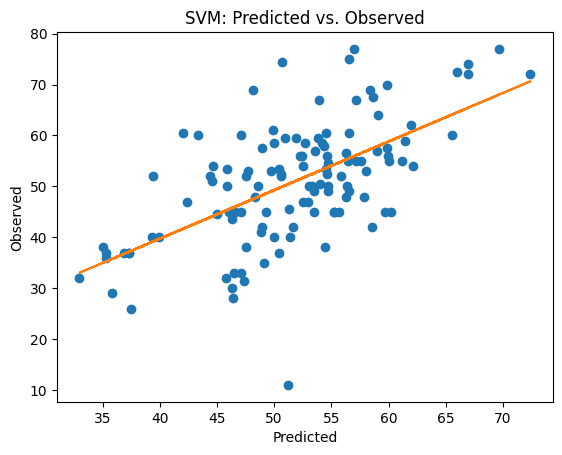

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *

# Define the parameter grid for SVM
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create an SVM regressor object
svm = SVR()

# Define the metrics to be used for scoring (This was missing)
metrics = ('r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error')
nfolds = 3 # Assuming nfolds was also not defined, define it here

# Create a GridSearchCV object to find the best hyperparameters
svm = GridSearchCV(svm, parameters, scoring=metrics, cv=nfolds, refit=metrics[2], return_train_score=True)
# Fit the model to the training data
svm.fit(x_train, y_train)

# Training (GridSearch)
# (Results are already captured in svm.cv_results_ from the GridSearchCV)

# Testing
print("Best Kernel: %s, C: %s, Gamma: %s, RMSE: %.6f" % (svm.best_params_['kernel'], svm.best_params_['C'], svm.best_params_['gamma'], abs(svm.best_score_)))
ypred_svm = svm.best_estimator_.predict(x_test)

# Scatter plot - predicted and observed
plt.figure()  # Create a new figure for SVM plot
plt.plot(ypred_svm, y_test, 'o')
m, b = np.polyfit(ypred_svm, y_test, 1)
plt.plot(ypred_svm, m*ypred_svm + b)
plt.title('SVM: Predicted vs. Observed')
plt.xlabel('Predicted')
plt.ylabel('Observed')

# Metrics - testing
pd.DataFrame({'Kernel': [svm.best_params_['kernel']],
              'C': [svm.best_params_['C']],
              'Gamma': [svm.best_params_['gamma']],
              'R2': r2_score(y_test, ypred_svm),
              'MAE': [abs(mean_absolute_error(y_test, ypred_svm))],
              'RMSE': [abs(mean_squared_error(y_test, ypred_svm, squared=False))]})

Decision Trees

Best Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 1, RMSE: 10.751150


""


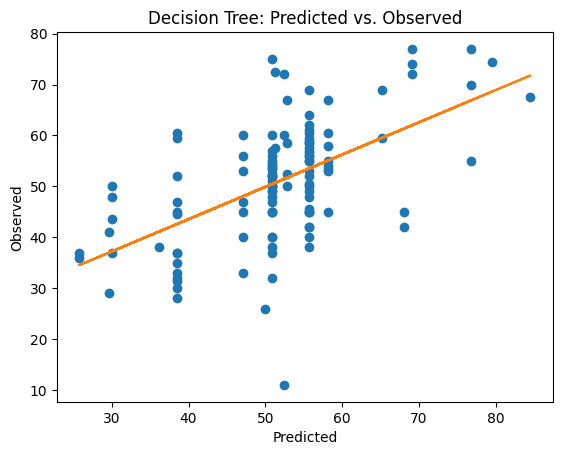

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *

# Define the parameter grid for Decision Trees
parameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree regressor object
dt = DecisionTreeRegressor(random_state=40)

# Create a GridSearchCV object to find the best hyperparameters
dt = GridSearchCV(dt, parameters, scoring=metrics, cv=nfolds, refit=metrics[2], return_train_score=True)

# Fit the model to the training data
dt.fit(x_train, y_train)

# Training (GridSearch)
# (Results are already captured in dt.cv_results_ from the GridSearchCV)

# Testing
print("Best Max Depth: %s, Min Samples Split: %s, Min Samples Leaf: %s, RMSE: %.6f" % (dt.best_params_['max_depth'], dt.best_params_['min_samples_split'], dt.best_params_['min_samples_leaf'], abs(dt.best_score_)))
ypred_dt = dt.best_estimator_.predict(x_test)

# Scatter plot - predicted and observed
plt.figure()  # Create a new figure for Decision Tree plot
plt.plot(ypred_dt, y_test, 'o')
m, b = np.polyfit(ypred_dt, y_test, 1)
plt.plot(ypred_dt, m*ypred_dt + b)
plt.title('Decision Tree: Predicted vs. Observed')
plt.xlabel('Predicted')
plt.ylabel('Observed')

# Metrics - testing
import pandas as pd
pd.DataFrame({})